In [1]:
#simplification model:
!pip install --upgrade --force-reinstall gensim
!pip install transformers
!pip install torch
!pip install wordfreq
!pip install keybert
!pip install pandas numpy spacy nltk textstat scikit-learn sentence-transformers tensorflow torch matplotlib seaborn transformers huggingface_hub
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [1]:
!pip install gdown

In [ ]:
import gdown
from google.colab import files
import shutil
import os

# Google Drive file ID extracted from your link
file_id = "1QCCpFAz3Tzk_XLJ0YSA6PhW1kbSbIAvm"

# Create the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Set output file name (or it will default to the Drive filename)
output = "Updated1_Text_Similarity_and_Complexity_Dataset (1).csv"  # Change extension if needed

# Download the file
gdown.download(url, output, quiet=False)

In [ ]:
# Upload a file
uploaded = files.upload()

# Get the uploaded file name
for filename in uploaded.keys():
    # Rename the uploaded file to 'image.png'
    shutil.move(filename, 'image.png')
    print(f"Uploaded file saved as image.png")
    break  # Only handle the first file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from nltk import word_tokenize
from functools import lru_cache
import re
import unicodedata
import sys
from collections import Counter
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('punkt_tab')
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
!pip install --upgrade --force-reinstall gensim
!pip install transformers
!pip install torch
!pip install wordfreq
!pip install spacy
!pip install keybert sentence-transformers scikit-learn numpy
!pip install rouge
!pip install deepmultilingualpunctuation
# !pip install ollama
!pip install pandas numpy matplotlib nltk keras tensorflow scikit-learn seaborn transformers torch keybert deepmultilingualpunctuation spacy sentence-transformers rouge wordfreq
nltk.download('punkt_tab')


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
!pip install --upgrade --force-reinstall gensim

In [5]:
Dataset = namedtuple('Dataset', 'name, train, test')
Model = namedtuple('Model', 'type, name, dimension, corpus, model')

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [5]:
!wget https://www.inf.uni-hamburg.de/en/inst/ab/lt/resources/data/complex-word-identification-dataset/cwishareddataset.zip

--2025-05-12 15:04:41--  https://www.inf.uni-hamburg.de/en/inst/ab/lt/resources/data/complex-word-identification-dataset/cwishareddataset.zip
Resolving www.inf.uni-hamburg.de (www.inf.uni-hamburg.de)... 134.100.36.5
Connecting to www.inf.uni-hamburg.de (www.inf.uni-hamburg.de)|134.100.36.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cwishareddataset.zip’

cwishareddataset.zi     [     <=>            ]   1.03M  1.12MB/s    in 0.9s    

2025-05-12 15:04:43 (1.12 MB/s) - ‘cwishareddataset.zip’ saved [1075894]



In [6]:
!unzip cwishareddataset.zip

Archive:  cwishareddataset.zip
   creating: traindevset/
   creating: traindevset/german/
  inflating: traindevset/german/German_Train.tsv  
  inflating: traindevset/german/German_Dev.tsv  
  inflating: traindevset/README.md   
   creating: traindevset/english/
  inflating: traindevset/english/WikiNews_Train.tsv  
  inflating: traindevset/english/Wikipedia_Train.tsv  
  inflating: traindevset/english/Wikipedia_Dev.tsv  
  inflating: traindevset/english/News_Dev.tsv  
  inflating: traindevset/english/News_Train.tsv  
  inflating: traindevset/english/WikiNews_Dev.tsv  
   creating: traindevset/spanish/
  inflating: traindevset/spanish/Spanish_Train.tsv  
  inflating: traindevset/spanish/Spanish_Dev.tsv  
  inflating: README.md               
   creating: testset/
   creating: testset/german/
  inflating: testset/german/German_Test.tsv  
  inflating: testset/README.md       
   creating: testset/english/
  inflating: testset/english/Wikipedia_Test.tsv  
   creating: __MACOSX/
   creating:

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
MAIN_PATH_DATASET = "traindevset/english/"
genres = ['Wikipedia', 'WikiNews', 'News']
datasets = ['Train', 'Dev']
columns = ['id', 'sentence', "start", "end", "target",
           "nat", "non_nat", "nat_marked", "non_nat_marked", "binary", "prob"]


datasets = [Dataset('Wikipedia', 'Train', 'Dev'),
            Dataset('WikiNews', 'Train', 'Dev'),
            Dataset('News', 'Train', 'Dev')]

feature_categories = []

def load_df(path):
    df = pd.read_csv(path, header=None, sep = "\t")
    df.columns = columns
    return df

datasets = [Dataset(d.name, load_df(MAIN_PATH_DATASET + d.name + '_' + d.train + '.tsv'),
                            load_df(MAIN_PATH_DATASET + d.name + '_' + d.test + '.tsv'))
                            for d in datasets]




In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-05-12 15:04:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-12 15:04:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-12 15:04:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [9]:
!unzip glove.6B.zip -d embeddings

Archive:  glove.6B.zip
  inflating: embeddings/glove.6B.50d.txt  
  inflating: embeddings/glove.6B.100d.txt  
  inflating: embeddings/glove.6B.200d.txt  
  inflating: embeddings/glove.6B.300d.txt  


In [4]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

MAIN_PATH = 'embeddings/'


glove_models = []

glove_defs = [ Model('glove', 'glove.6B.300d.txt', 300, 'wikipedia+gigaword5', None)]

for model in glove_defs:
    glove_file = MAIN_PATH + model.name
    tmp_file = get_tmpfile(model.name + '-temp')
    glove2word2vec(glove_file, tmp_file)
    vecs = KeyedVectors.load_word2vec_format(tmp_file)
    glove_models.append(Model(model.type, model.name, model.dimension, model.corpus, vecs))
    print('load model : {}'.format(model.name))

print(glove_models)

<ipython-input-4-0a27a5859e3f>:15: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, tmp_file)


load model : glove.6B.300d.txt
[Model(type='glove', name='glove.6B.300d.txt', dimension=300, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.KeyedVectors object at 0x78d58519ff50>)]


In [6]:
dataframe = datasets[0].train[0:30]

def overlaps(start1, end1, start2, end2):
    return bool(range(max(start1, start2), min(end1, end2)+1))

def extract_ngrams_group(group):
    targets = zip(group['target'].values.tolist(), group['start'].values.tolist(),
                 group['end'].values.tolist(), group['binary'].values.tolist())
    for word, start, end, binary in targets:
        tokens = word.split()
        if len(tokens)>1:
            olap_words = [(w, b) for w, s, e, b in targets if overlaps(start, end, s, e)]


grouped = dataframe.groupby('sentence').apply(lambda group : extract_ngrams_group(group))

<ipython-input-6-09bec9ffb562>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dataframe.groupby('sentence').apply(lambda group : extract_ngrams_group(group))


In [7]:
wordlist_lowercased = set(i.lower() for i in brown.words())
print (len(wordlist_lowercased))

49815


In [8]:
tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))

def remove_punctuation(text):
    return text.translate(tbl)

@lru_cache(maxsize=None)
def all_tokens_with_index(context):
    curr_pos = 0
    targets = []
    j = 0
    w = 0
    curr_split = ''
    ctx_split = context.split()
    whitespaces = re.findall('\s+', context)
    num_whitespaces = [len(token) for token in whitespaces]
    num_whitespaces.append(1)
    tokens = word_tokenize(context)
    tokens = ['"' if token not in context else token for token in tokens]
    for index, token in enumerate(tokens, 1):
        targets.append((token, index, curr_pos, (curr_pos + len(token))))
        curr_pos += len(token)
        curr_split += token
        if ctx_split[j] == curr_split:
            curr_pos += num_whitespaces[w]
            j += 1
            w += 1
            curr_split = ''
    return [val for val in targets if val[0] != '"']

def build_vocabulary(sentences, embedding_model, dimension):
    all_words = [tpl[0] for sentence in sentences for tpl in sentence['seq']] + list(wordlist_lowercased)
    print('# Words : {}'.format(len(all_words)))
    counter = Counter(all_words)
    vocab_size = len(counter) + 1
    print('# Vocab : {}'.format(vocab_size))
    # Use key_to_index instead of vocab
    print('# embedding model  : {}'.format(len(embedding_model.key_to_index)))
    word2index = {word : index for index, (word, count) in enumerate(counter.most_common(), 1)}
    index2word = {index : word for word, index in word2index.items()}
    # +1 required for pad token
    embedding_matrix = np.zeros(((vocab_size), dimension))
    missing_embed_words = []
    i_ = 0
    for word, index in word2index.items():
        # Check if word is in the model's vocabulary using key_to_index
        if word in embedding_model.key_to_index:
            embedding = embedding_model[word]
        else:
             i_ +=1
             continue
        embedding_matrix[index] = embedding
    missing_embed_count = len(missing_embed_words)
    print('# Words missing embedding : {}'.format(missing_embed_count))
    print('Embedding shape : {}'.format(embedding_matrix.shape))
    print("i: ", i_ )
    return word2index, index2word, embedding_matrix

def forward_transformation(dataframe, lowercase = True, filter_punc = True, filtering = "a132"):
    grouped = dataframe.groupby('sentence').apply(lambda row :
                        {'sent_id' : list(set(row['sent_id']))[0],
                         'sentence' : list(set(row['sentence']))[0],
                         'tags': [tag for tag in zip(row['target'],
                            row['start'], row['end'], row['binary'], row['prob'])]})
    sentences = []
    for vals in grouped:
        sent_id = vals['sent_id']
        sentence = vals['sentence']
        tags = vals['tags']
        tags_without_labels = [(word, start, end) for word, start, end, binary, prob in tags]
        all_tokens = all_tokens_with_index(sentence)
        sent_repr = [(word, start, end, tags[tags_without_labels.index((word, start, end))][3],
                     tags[tags_without_labels.index((word, start, end))][4])
           if (word, start, end) in tags_without_labels
          else (word, start, end, 0, 0.0) for word, index, start, end in all_tokens]
        if lowercase:
            sent_repr = [(word.lower(), start, end, binary, prob)
                         for word, start, end, binary, prob in sent_repr]
        if filter_punc:
            sent_repr = list(filter(lambda vals : remove_punctuation(vals[0]), sent_repr))
        if filtering:
            sent_repr = list(filter(lambda vals : vals[0] != "'s", sent_repr))
            sent_repr = list(filter(lambda vals : vals[0] != "``", sent_repr))
        sentences.append({'sent_id' : sent_id, 'sentence' : sentence, 'seq' : sent_repr})
    return sentences

def split_sentence_seqs(sentences):
    words, start_end, binary, prob = [], [], [] ,[]
    for sent in sentences:
        sequence = sent['seq']
        curr_w, curr_se, curr_b, curr_p = map(list, zip(*[(vals[0],
            (vals[1], vals[2]), vals[3], vals[4]) for vals in sequence]))
        words.append(curr_w)
        start_end.append(curr_se)
        binary.append(curr_b)
        prob.append(curr_p)
    return words, start_end, binary, prob

In [9]:
import pandas as pd
datasets.append(Dataset('train_all_test_wiki',
         pd.concat([datasets[0].train, datasets[1].train, datasets[2].train]), datasets[0].test))

In [10]:
# Append train and test set
dataset_sel = datasets[3]
train_num_rows = dataset_sel.train.shape[0]
train_num_sents = len(list(set(dataset_sel.train.sentence.values.tolist())))

test_num_rows = dataset_sel.test.shape[0]
test_num_sents = len(list(set(dataset_sel.test.sentence.values.tolist())))

dataset = pd.concat([dataset_sel.train, dataset_sel.test], ignore_index=True)
dataset['sent_id'] = dataset.groupby('sentence').ngroup()
dataset_num_rows = dataset.shape[0]
dataset_num_sents = len(list(set(dataset.sentence.values.tolist())))

print('# Rows train : {}'.format(train_num_rows))
print('# Rows test : {}'.format(test_num_rows))
print('# Rows dataset : {}'.format(dataset_num_rows))

print('# Sents train : {}'.format(train_num_sents))
print('# Sents test : {}'.format(test_num_sents))
print('# Sents dataset : {}'.format(dataset_num_sents))

# Rows train : 27299
# Rows test : 694
# Rows dataset : 27993
# Sents train : 1988
# Sents test : 53
# Sents dataset : 2041


In [11]:
dataset

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob,sent_id
0,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",0,8,Normally,10,10,0,1,1,0.05,1347
1,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",28,34,passed,10,10,0,1,1,0.05,1347
2,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",15,19,land,10,10,0,0,0,0.00,1347
3,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,49,future,10,10,1,0,1,0.05,1347
4,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,61,future generations,10,10,1,2,1,0.15,1347
...,...,...,...,...,...,...,...,...,...,...,...,...
27988,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,100,109,knowledge,10,10,0,2,1,0.10,929
27989,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,74,80,person,10,10,0,0,0,0.00,929
27990,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,95,99,true,10,10,0,0,0,0.00,929
27991,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,113,122,purifying,10,10,7,8,1,0.75,929


In [12]:
sentences = forward_transformation(dataset)
train_sentences = sentences[:train_num_sents]
test_sentences = sentences[train_num_sents:]

<ipython-input-8-a74b4952f175>:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dataframe.groupby('sentence').apply(lambda row :


In [13]:
words, start_end, binary, prob = split_sentence_seqs(sentences)

In [14]:
sentence_lens = [len(sent) for sent in words]

In [15]:
embedding_model = glove_models[0].model
dimension = embedding_model.vector_size
word2index, index2word, embedding = build_vocabulary(sentences, embedding_model, dimension)

# Words : 96437
# Vocab : 52455
# embedding model  : 400000
# Words missing embedding : 0
Embedding shape : (52455, 300)
i:  9834


In [16]:

words_with_indices = [[word2index[word] for word in sent] for sent in words]
sent_lens = [len(sentence['seq']) for sentence in sentences]
sent_max_length = np.max(sent_lens)
print('Max length sentence : {}'.format(sent_max_length))

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

words_padded = pad_sequences(maxlen=sent_max_length, sequences=words_with_indices, padding="post", value=0)
binary_padded = pad_sequences(maxlen=sent_max_length, sequences=binary, padding="post", value=0)
prob_padded = pad_sequences(maxlen=sent_max_length, sequences=prob, padding="post", value=0, dtype="float")

binary_padded_categorical = [to_categorical(clazz, num_classes=2) for clazz in binary_padded]

Max length sentence : 103


In [17]:

# (1) Training set
train_words_padded = words_padded[:train_num_sents]
train_binary_padded = binary_padded[:train_num_sents]
train_binary_padded_categorical = binary_padded_categorical[:train_num_sents]
train_prob_padded = prob_padded[:train_num_sents]
train_start_end = start_end[:train_num_sents]

# (2) Test set
test_words_padded = words_padded[train_num_sents:]
test_binary_padded = binary_padded[train_num_sents:]
test_binary_padded_categorical = binary_padded_categorical[train_num_sents:]
test_prob_padded = prob_padded[train_num_sents:]
test_start_end = start_end[train_num_sents:]

print('Training set length : {}'.format(len(train_words_padded)))
print('Test set length : {}'.format(len(test_words_padded)))

Training set length : 1988
Test set length : 53


In [18]:
from sklearn.metrics import f1_score
import keras.callbacks
from keras import backend as K
class Metrics(keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.f1_scores = []
        self.validation_data = validation_data

    def on_epoch_end(self, batch, logs={}):
        predict = np.asarray(self.model.predict(self.validation_data[0]))
        targ = self.validation_data[1]
        targ = np.array(targ)
        shape = targ.shape
        targ = targ.reshape((shape[0]*shape[1], shape[2]))
        targ = np.argmax(targ, axis = 1)
        predict = predict.reshape((shape[0]*shape[1]), shape[2])
        predict = np.argmax(predict, axis = 1)
        self.f1s=f1_score(targ, predict)
        print("\nF1 Score:")
        print(f1_score(targ, np.ones(shape[0]*shape[1])))
        self.f1_scores.append(self.f1s)
        return

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input,LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
vocab_size = embedding.shape[0]
dimension = embedding.shape[1]

np.set_printoptions(threshold=np.inf)

in_seq = Input(shape=(sent_max_length,))
embed = Embedding(input_dim=vocab_size, output_dim=dimension, \
                  weights=[embedding], input_length=sent_max_length)(in_seq)
drop = Dropout(0.1)(embed)
lstm = Bidirectional(LSTM(units=150, return_sequences=True, recurrent_dropout=0.1))(drop)
out = TimeDistributed(Dense(2, activation="softmax"))(lstm)

model = Model(in_seq, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

metrics = Metrics((test_words_padded, np.array(test_binary_padded_categorical)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 103)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 103, 300)       │    15,736,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 103, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 103, 300)       │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 103, 2)         │           602 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,278,302 (62.10 MB)

 Trainable params: 16,278,302 (62.10 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_words_padded, np.array(train_binary_padded_categorical), batch_size=10,
                    epochs=3, validation_data = (test_words_padded, np.array(test_binary_padded_categorical)),
                    verbose=1, callbacks=[metrics])

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step

F1 Score:
0.05660377358490566
199/199 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9548 - loss: 0.1135 - val_accuracy: 0.9788 - val_loss: 0.0436
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

F1 Score:
0.05660377358490566
199/199 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9828 - loss: 0.0395 - val_accuracy: 0.9820 - val_loss: 0.0446
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

F1 Score:
0.05660377358490566
199/199 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9874 - loss: 0.0301 - val_accuracy: 0.9824 - val_loss: 0.0434


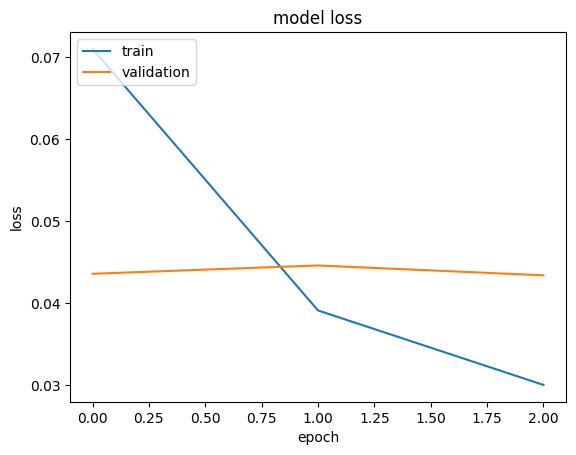

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

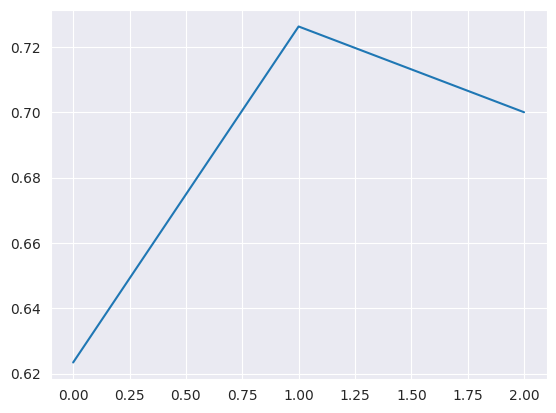

In [22]:
import seaborn as sns
sns.set_style("darkgrid")
epoch_f1s = plt.plot(metrics.f1_scores)
plt.show()

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
model_save_name = 'model_CWI_full.h5'
path_dir = F"/content/gdrive/My Drive/{model_save_name}"

In [25]:
from keras.models import load_model

model.save(path_dir)  # creates a HDF5 file 'model_CWI_full.h5'

In [26]:
from keras.models import load_model

model_cwi = load_model(path_dir)

In [26]:
# stop_words_ = set(stopwords.words('english'))
# def cleaner(word):
#   #Remove links
#   word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',
#                 '', word, flags=re.MULTILINE)
#   word = re.sub('[\W]', ' ', word)
#   word = re.sub('[^a-zA-Z]', ' ', word)
#   return word.lower().strip()

In [27]:
def process_input(input_text, model_cwi=None):
  input_text = cleaner(input_text)
  clean_text = []
  index_list = []
  input_token = []

  for i, word in enumerate(input_text.split()):
    if word in word2index:
      clean_text.append(word)
      input_token.append(word2index[word])
    else:
      index_list.append(i)

  # Use the correct sequence length that the model expects (103)
  input_padded = pad_sequences(maxlen=103, sequences=[input_token], padding="post", value=0)
  return input_padded, index_list, len(clean_text)

In [28]:
def complete_missing_word(pred_binary, index_list, len_list):
  list_cwi_predictions = list(pred_binary[0][:len_list])
  for i in index_list:
    list_cwi_predictions.insert(i, 0)
  print(list_cwi_predictions)
  return list_cwi_predictions


In [29]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

bert_model = 'bert-large-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model)
model = BertForMaskedLM.from_pretrained(bert_model)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-

In [30]:
from wordfreq import zipf_frequency
zipf_frequency('stop', 'en')
from wordfreq import zipf_frequency
zipf_frequency('drop', 'en')


4.99

In [31]:
import nltk
import re
import requests
from wordfreq import zipf_frequency
from nltk.corpus import wordnet

# One-time downloads:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger_eng')

DICT_API_URL = "https://api.dictionaryapi.dev/api/v2/entries/en/{}"

def noun_phrase_terms(text, top_n=8):
    tokens  = nltk.word_tokenize(text)
    tags    = nltk.pos_tag(tokens)
    grammar = "NP: {<JJ>*<NN.*>+}"
    tree    = nltk.RegexpParser(grammar).parse(tags)
    phrases = [" ".join(w for w,_ in t.leaves()).lower()
               for t in tree.subtrees() if t.label()=="NP"]
    return sorted(set(phrases), key=lambda p: -len(p))[:top_n]

def clean_definition(defn: str) -> str:
    # take only up to first period
    part = defn.split('.', 1)[0].strip()
    # strip nested parentheses
    part = re.sub(r'\(.*?\)', '', part).strip()
    # drop leading articles
    part = re.sub(r'^(?:[Aa]n?|[Tt]he)\s+', '', part)
    return part

def get_definition(term: str) -> str | None:
    # 1) WordNet lookup (full phrase, underscored, head noun)
    for form in (term, term.replace(' ', '_'), term.split()[0]):
        syns = wordnet.synsets(form, pos=wordnet.NOUN)
        if syns:
            return clean_definition(syns[0].definition())

    # 2) Free Dictionary API fallback
    try:
        resp = requests.get(DICT_API_URL.format(term), timeout=2)
        resp.raise_for_status()
        data = resp.json()
        # data is a list of entries; pick the first meaning.definition
        meaning = data[0]['meanings'][0]
        definition = meaning['definitions'][0]['definition']
        return clean_definition(definition)
    except Exception:
        return None

def annotate_subject_terms(text: str,
                           difficulty_threshold: float = 4.0) -> str:
    terms = noun_phrase_terms(text)
    difficult = [
        t for t in terms
        if sum(zipf_frequency(w, 'en') for w in t.split())/len(t.split())
           < difficulty_threshold
    ]

    annotated = text
    for term in difficult:
        definition = get_definition(term)
        if not definition:
            # no definition anywhere, skip
            continue
        replacement = f"{term} — {definition}"
        pattern     = re.compile(rf'\b{re.escape(term)}\b', re.IGNORECASE)
        annotated   = pattern.sub(replacement, annotated, count=1)

    return annotated

# # Example
# if __name__ == "__main__":
#     test_text = (
#         "In our study, the thermocline separates the ocean into distinct layers and affects marine life. "
#         "Ocean stratification is also influenced by temperature gradients."
#     )
#     print(annotate_subject_terms(test_text))

In [32]:
!pip install --upgrade transformers

In [33]:
from keybert import KeyBERT
import nltk
import torch
from wordfreq import zipf_frequency

import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

bert_model = 'bert-large-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model)
model_2 = BertForMaskedLM.from_pretrained(bert_model)

kw_model = KeyBERT()  # Initialize KeyBERT once

def get_bert_candidates(input_text, list_cwi_predictions, numb_predictions_displayed=10, chunk_size=510, max_length=512):
    list_candidates_bert = []
    technical_terms = []

    # Split the input text into sentences using nltk
    sentences = nltk.sent_tokenize(input_text)

    document_keywords = kw_model.extract_keywords(input_text, keyphrase_ngram_range=(1,2), top_n=8)
    global_subject_keywords = set([kw[0].lower() for kw in document_keywords])

    # Track position in the overall list_cwi_predictions
    current_position = 0

    for sentence in sentences:
        # Use KeyBERT to extract top 5 keywords from the sentence
        keywords = kw_model.extract_keywords(sentence, keyphrase_ngram_range=(1,2), top_n=5)
        # Build a set of keywords (in lowercase) to be skipped
        subject_keywords = set([kw[0].lower() for kw in keywords]).union(global_subject_keywords)

        # Split the sentence into chunks (if needed)
        words_in_sentence = sentence.split()

        # Get cwi predictions for this sentence
        sentence_cwi_predictions = list_cwi_predictions[current_position:current_position + len(words_in_sentence)]
        current_position += len(words_in_sentence)

        num_chunks = (len(words_in_sentence) + chunk_size - 1) // chunk_size
        for i in range(num_chunks):
            chunk_start = i * chunk_size
            chunk_end = min((i + 1) * chunk_size, len(words_in_sentence))
            chunk_words = words_in_sentence[chunk_start:chunk_end]
            chunk_text = " ".join(chunk_words)
            chunk_cwi_predictions = sentence_cwi_predictions[chunk_start:chunk_end]

            # Make sure we have enough predictions for the words
            if len(chunk_cwi_predictions) < len(chunk_words):
                continue  # Skip this chunk if we don't have enough predictions

            for j, (word, pred) in enumerate(zip(chunk_words, chunk_cwi_predictions)):
                # Skip words that are considered subject keywords by KeyBERT
                if len(word) < 4:
                    continue

                if '-' in word:
                    continue

                # Check complexity
                complexity_score = zipf_frequency(word, 'en')

                # Handle subject keywords differently
                if word.lower() in subject_keywords:
                    # If it's a complex subject keyword, add it for explanation
                    if complexity_score < 3 and len(word) > 4:
                        technical_terms.append(word)
                    continue

                # Process regular complex words as before
                if complexity_score > 4:
                    continue

                # Create masked version of the chunk for BERT MLM
                replace_word_mask = chunk_text.replace(word, '[MASK]', 1)  # Replace only first occurrence
                text_for_bert = f'[CLS] {replace_word_mask} [SEP] {chunk_text} [SEP]'
                tokenized_text = tokenizer.tokenize(text_for_bert)

                # Find the masked index
                try:
                    masked_index = tokenized_text.index('[MASK]')
                except ValueError:
                    # Skip if [MASK] token isn't found
                    continue

                indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
                segments_ids = [0] * len(tokenized_text)

                # Check if we have enough context for the model
                if len(indexed_tokens) > max_length:
                    continue

                tokens_tensor = torch.tensor([indexed_tokens])
                segments_tensors = torch.tensor([segments_ids])

                with torch.no_grad():
                    try:
                        # IMPORTANT: Using BertForMaskedLM model here (not the model_cwi)
                        outputs = model_2(tokens_tensor, token_type_ids=segments_tensors)
                        predictions = outputs.logits[0][masked_index]
                    except (TypeError, IndexError):
                        try:
                            # Fall back approach
                            outputs = model_2(tokens_tensor)
                            predictions = outputs.logits[0][masked_index]
                        except (IndexError, KeyError, AttributeError):
                            try:
                                # Another fallback for different output structure
                                if hasattr(outputs, "logits"):
                                    predictions = outputs.logits[0, masked_index]
                                else:
                                    predictions = outputs[0][0][masked_index]
                            except:
                                continue  # Skip if we can't get predictions

                predicted_ids = torch.argsort(predictions, descending=True)[:numb_predictions_displayed]
                predicted_tokens = tokenizer.convert_ids_to_tokens(list(predicted_ids))
                list_candidates_bert.append((word, predicted_tokens))

    return list_candidates_bert, list(set(technical_terms))

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
stop_words_ = set(stopwords.words('english'))
def cleaner(word):
  #Remove links
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',
                '', word, flags=re.MULTILINE)
  word = re.sub('[\W]', ' ', word)
  word = re.sub('[^a-zA-Z]', ' ', word)
  return word.lower().strip()

In [53]:
list_texts = []


In [36]:
#VLLM INSTALLATION
!pip install groq requests

#TextBook
!pip install pandas numpy spacy nltk textstat scikit-learn sentence-transformers tensorflow torch matplotlib seaborn transformers huggingface_hub
!python -m spacy download en_core_web_sm
!pip install gradio
!pip install pandas numpy matplotlib nltk gensim keras tensorflow scikit-learn seaborn transformers torch keybert deepmultilingualpunctuation spacy sentence-transformers rouge wordfreq
!python -m nltk.downloader punkt_tab # download the missing data resource
!python -m nltk.downloader punkt_tab # download the missing data resource
!pip install spacy
!pip install keybert sentence-transformers scikit-learn numpy
!pip install rouge
!pip install deepmultilingualpunctuation
!pip install ollama
!pip install pandas numpy matplotlib nltk gensim keras tensorflow scikit-learn seaborn transformers torch keybert deepmultilingualpunctuation spacy sentence-transformers rouge wordfreq
# nltk.download('punkt_tab')
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 2.8 MB/s eta 0:00:00
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load a

In [37]:
# !pip install gensim
!pip install wordfreq
!pip install transformers
!pip install torch

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/model_CWI_full.h5"
from tensorflow.keras.models import load_model

# Define the model path
model_path = "/content/gdrive/My Drive/model_CWI_full.h5"

# Load the model
model = load_model(model_path)

# Confirm successful loading
print("Model loaded successfully!")
model.summary()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'/content/gdrive/My Drive/model_CWI_full.h5'


Model loaded successfully!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 103)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 103, 300)       │    15,736,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 103, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 103, 300)       │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 103, 2)         │           602 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,278,304 (62.10 MB)

 Trainable params: 16,278,302 (62.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
#simplification model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from nltk import word_tokenize
from functools import lru_cache
import re
import unicodedata
import sys
from collections import Counter
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('punkt_tab')
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [40]:

import base64
from groq import Groq
from PIL import Image

desc=""
# global embedding_dim_global
# embedding_dim_global = 0 # Example BERT embedding size
# global feature_dim_global
# feature_dim_global = 0   # Example handcrafted features size
# global hidden_dim_global
# hidden_dim_global =0# Hidden layer size


class MyClass:
    def __init__(self, image_path, client=None, model="meta-llama/llama-4-maverick-17b-128e-instruct"):
        """Initialize the class with an image, Groq API client, and model."""
        self.image_path = image_path
        self.image = Image.open(image_path)  # Load the image
        self.chart_description = None
        self.client = client if client else Groq(api_key="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")
        self.model = model

    def show_image(self):
        """Display the image."""
        self.image.show()

    def encode_image(self):
        """Encodes the image file to Base64 format."""
        with open(self.image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")

    def describe_chart(self):
        """Sends the encoded image to the Groq API for description and returns the response."""
        image_base64 = self.encode_image()

        prompt = """Describe the given chart in a way that makes it accessible to blind students.
        Use clear, vivid sensory language and appropriate figures of speech to convey patterns, trends,
        and key takeaways. Ensure the description aligns with standard textbook explanations while making
        it engaging and easy to understand. Follow this structure:

        Introduction (Context & Purpose):
        Briefly explain what the chart represents (e.g., "This bar chart is like a staircase showing the rise and fall of...").
        State why it matters in the subject area (e.g., "In economics, this trend helps us understand...").

        Breakdown of Data (Sensory & Figurative Language):
        Describe trends dynamically (e.g., "The line shoots up like a rocket..." or "The bars stand tall like skyscrapers, but then shrink like melting ice.").
        Use tactile metaphors (e.g., "Imagine running your fingers over a set of hills—some high, some low. That’s how the numbers change.").

        Key Insights (Textbook Relevance):
        Connect findings to real-world examples or textbook concepts (e.g., "Just like how supply and demand shift, this chart shows...").
        Highlight cause-and-effect relationships in an intuitive way.

        Conclusion (Summary & Importance):
        Reinforce the main takeaway in a simple, memorable way (e.g., "Like a roller coaster, these numbers tell the story of...").
        Emphasize why understanding this chart is useful for the subject.

        Ensure the explanation is engaging, precise, and free from unnecessary complexity while maintaining academic accuracy and keep the language simple."""

        response = self.client.chat.completions.create(
            model=self.model,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": prompt},
                        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_base64}"}}
                    ]
                }
            ],
            temperature=1,
            max_tokens=1024,
            top_p=1,
            stream=False
        )

        self.chart_description = response.choices[0].message.content
        return self.chart_description

    def main(self):
        """Runs the image processing and description generation."""
        self.show_image()
        description = self.describe_chart()
        return description
        # print("\nChart Description:\n", description)




In [42]:

#vllm
import base64
from groq import Groq
from PIL import Image

#textbook model:
import os
import torch
from transformers import BertTokenizer
import numpy as np
from sentence_transformers import SentenceTransformer
import textstat
import spacy
from nltk.corpus import stopwords
import nltk
import re
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_global=None

# Clean text function
def clean_text_with_stopwords(text):
    text = text.replace("<|end|>", "")  # Remove <|end|>
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9.,%]', ' ', text)  # Keep alphanumeric and punctuation
    text = text.lower().strip()

    filtered_words = [word for word in text.split() if word not in stop_words]
    return ' '.join(filtered_words)

# Initialize spaCy model for tokenization
nlp = spacy.load("en_core_web_sm")

def tokenize_text(text):
    doc = nlp(text)  # Process the text using spaCy
    tokens = [token.text for token in doc]
    return tokens

# Readability metrics functions
def compute_readability_features(text):
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    gunning_fog = textstat.gunning_fog(text)
    return flesch_reading_ease, gunning_fog

# Average Sentence Length with punctuation exclusion
def avg_sentence_length(text):
    doc = nlp(text)
    sentences = list(doc.sents)  # Use spaCy to split text into sentences
    if len(sentences) == 0:  # Handle empty text if necessary
        return 0
    total_words = sum(len(sent.text.split()) for sent in sentences)
    return total_words / len(sentences)

# Lexical feature for unique word ratio
def unique_word_ratio(tokens):
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

# Define a function to preprocess the input sentence and get the BERT embeddings
def preprocess_input(sentence):
    bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # Sentence BERT model
    # Generate embeddings for the sentence
    embeddings = bert_model.encode(sentence)  # Embedding is a 2D array if a list of sentences is passed
    return embeddings # Returns a single embedding if a single sentence is passed

# Define dataset class
class TextDataset(Dataset):
    def __init__(self, bert_embeddings, features, complexity_labels):
        self.embeddings = torch.tensor(bert_embeddings, dtype=torch.float32)
        self.features = torch.tensor(features, dtype=torch.float32)
        self.complexity_labels = torch.tensor(complexity_labels, dtype=torch.long)

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.features[idx], self.complexity_labels[idx]


def prepare_dataset(df, bert_embeddings_dataset):
    # Load dataset features and labels
    df['Flesch_Reading_Ease'], df['Gunning_Fog'] = zip(*df['Cleaned_Text'].apply(compute_readability_features))
    df['Avg_Sentence_Length'] = df['Cleaned_Text'].apply(avg_sentence_length)
    df['Unique_Word_Ratio'] = df['Tokens'].apply(unique_word_ratio)

    features = df[['Flesch_Reading_Ease', 'Gunning_Fog', 'Avg_Sentence_Length', 'Unique_Word_Ratio']].values
    complexity_labels = df['Complexity'].map({'Low': 0, 'Moderate': 1, 'High': 2}).values

    # Split dataset
    X_train_embeddings, X_temp_embeddings, X_train_features, X_temp_features, y_train_complexity, y_temp_complexity = train_test_split(
    bert_embeddings_dataset, features, complexity_labels, test_size=0.3, random_state=42)
    X_val_embeddings, X_test_embeddings, X_val_features, X_test_features, y_val_complexity, y_test_complexity = train_test_split(
    X_temp_embeddings, X_temp_features, y_temp_complexity, test_size=0.5, random_state=42)

    # Create datasets and dataloaders
    train_dataset = TextDataset(X_train_embeddings, X_train_features, y_train_complexity)
    val_dataset = TextDataset(X_val_embeddings, X_val_features, y_val_complexity)
    test_dataset = TextDataset(X_test_embeddings, X_test_features, y_test_complexity)

    return train_dataset, val_dataset, test_dataset

def create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size=16):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

class MultiTaskModel(nn.Module):
    def __init__(self, embedding_dim, feature_dim, hidden_dim):
        super(MultiTaskModel, self).__init__()

        # BERT Embedding Processing
        self.bert_fc = nn.Linear(embedding_dim, hidden_dim)
        self.bert_dropout = nn.Dropout(0.3)

        # Handcrafted Features Processing
        self.feature_fc = nn.Linear(feature_dim, hidden_dim)

        # Combined Processing
        self.combined_fc = nn.Linear(hidden_dim * 2, hidden_dim)

        # Output Heads
        #self.regression_head = nn.Linear(hidden_dim, 1)  # Similarity score
        self.classification_head = nn.Linear(hidden_dim, 3)  # Complexity (3 classes)

    def forward(self, embeddings, features):
        # Process BERT embeddings
        bert_out = self.bert_fc(embeddings)
        bert_out = F.relu(bert_out)  # Apply ReLU activation
        bert_out = self.bert_dropout(bert_out)

        # Process handcrafted features
        feature_out = self.feature_fc(features)
        feature_out = F.relu(feature_out)  # Apply ReLU activation

        # Combine both
        combined_out = torch.cat((bert_out, feature_out), dim=1)
        combined_out = self.combined_fc(combined_out)
        combined_out = F.relu(combined_out)

        # Outputs
        #similarity_score = self.regression_head(combined_out)
        complexity_label = self.classification_head(combined_out)

        # similarity_score,
        return complexity_label


def initialize_model(embedding_dim, feature_dim, hidden_dim=128, lr=0.001):
    model = MultiTaskModel(embedding_dim, feature_dim, hidden_dim)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    return model, loss_fn, optimizer

def train_model(model, train_loader, val_loader, loss_fn, optimizer, epochs=10, model_path='best_model.pth'):
    best_val_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for embeddings, features, labels in train_loader:
            optimizer.zero_grad()
            preds = model(embeddings, features)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Training Loss: {total_loss}")

        # Validation
        model.eval()
        val_loss = 0
        true_labels, pred_labels = [], []
        with torch.no_grad():
            for embeddings, features, labels in val_loader:
                preds = model(embeddings, features)
                loss = loss_fn(preds, labels)
                val_loss += loss.item()
                true_labels.extend(labels.cpu().numpy())
                pred_labels.extend(torch.argmax(preds, dim=1).cpu().numpy())

        print("\nValidation Classification Report:")
        print(classification_report(true_labels, pred_labels, target_names=["Low", "Moderate", "High"]))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_path)

def evaluate_model(model, test_loader, loss_fn, model_path='best_model.pth'):
    model.load_state_dict(torch.load(model_path))
    model.eval()
    test_loss = 0
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for embeddings, features, labels in test_loader:
            preds = model(embeddings, features)
            loss = loss_fn(preds, labels)
            test_loss += loss.item()
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(torch.argmax(preds, dim=1).cpu().numpy())

    print("\nFinal Test Results:")
    print(f"Test Loss: {test_loss}")
    print("Test Classification Report:")
    print(classification_report(true_labels, pred_labels, target_names=["Low", "Moderate", "High"]))

def text_analysis_pipeline(input_text, df, model): # Pass df and model as arguments
    cleaned_text = clean_text_with_stopwords(input_text)
    bert_embeddings = preprocess_input(input_text)  # Get embeddings for input text

    # Calculate features for input text
    flesch_reading_ease, gunning_fog = compute_readability_features(cleaned_text)
    avg_sentence_len = avg_sentence_length(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    unique_word_ratio_val = unique_word_ratio(tokens)
    handcrafted_features = np.array([flesch_reading_ease, gunning_fog, avg_sentence_len, unique_word_ratio_val])

    # Convert features to tensor
    features_tensor = torch.tensor(handcrafted_features, dtype=torch.float32).unsqueeze(0)

    # Convert embeddings to tensor
    embeddings_tensor = torch.tensor(bert_embeddings, dtype=torch.float32).unsqueeze(0)

    # Make prediction
    with torch.no_grad():
        pred_complexity = model(embeddings_tensor, features_tensor)
        complexity_label = torch.argmax(pred_complexity, dim=1).item()

    return cleaned_text, ["Low", "Moderate", "High"][complexity_label]

def main():
    model_path = '/content/best_model.pth'
    dataset_path = "/content/Updated1_Text_Similarity_and_Complexity_Dataset (1).csv"

    global df_global
    global embedding_dim
    global feature_dim
    # Load dataset and preprocess
    df = pd.read_csv(dataset_path)

    df.loc[80:99, 'Text'] = df.loc[80:99, 'text']
    df.loc[80:99, 'Textbook Similarity'] = df.loc[80:99, 'textbook_similarity']
    df.loc[80:99, 'Complexity'] = df.loc[80:99, 'language_complexity']

    # Drop old column names
    df.drop(columns=['text', 'textbook_similarity', 'language_complexity'], inplace=True, errors='ignore')

    # Step 1: Cleaning
    df['Cleaned_Text'] = df['Text'].astype(str).apply(clean_text_with_stopwords)

    # Step 2: Tokenization
    df['Tokens'] = df['Cleaned_Text'].apply(tokenize_text)

    # Step 3: Compute readability and linguistic features
    df['Flesch_Reading_Ease'], df['Gunning_Fog'] = zip(*df['Cleaned_Text'].apply(compute_readability_features))
    df['Avg_Sentence_Length'] = df['Cleaned_Text'].apply(avg_sentence_length)
    df['Unique_Word_Ratio'] = df['Tokens'].apply(unique_word_ratio)

    bert_model = SentenceTransformer('all-MiniLM-L6-v2')
    bert_embeddings = bert_model.encode(df["Cleaned_Text"].tolist())

    # Get embedding dimension for model initialization
    embedding_dim = len(bert_embeddings[0])
    feature_dim = 4  # Number of handcrafted features

    # Initialize model
    model, loss_fn, optimizer = initialize_model(embedding_dim, feature_dim)

    if os.path.exists(model_path):
        print("Loading saved model...")
        model.load_state_dict(torch.load(model_path))
        model.eval()
    else:
        print("Training new model...")
        # Prepare dataset
        train_dataset, val_dataset, test_dataset = prepare_dataset(df, bert_embeddings)

        # Create dataloaders
        train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset)

        # Train model
        train_model(model, train_loader, val_loader, loss_fn, optimizer)

        # Evaluate model (optional, to check performance)
        evaluate_model(model, test_loader, loss_fn)

    df_global = df

    # Example Usage
    input_text = "This is a sample input text for testing."
    output_text, complexity_label = text_analysis_pipeline(input_text, df_global, model) # Pass df and model

    print(f"Input: {input_text}")
    print(f"Predicted Complexity Level: {complexity_label}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training new model...
Epoch 1, Training Loss: 15.675361096858978

Validation Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.91      0.93        35
    Moderate       0.50      0.20      0.29        15
        High       0.45      0.83      0.59        12

    accuracy                           0.73        62
   macro avg       0.63      0.65      0.60        62
weighted avg       0.74      0.73      0.71        62

Epoch 2, Training Loss: 13.902790635824203

Validation Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.91      0.93        35
    Moderate       0.46      0.87      0.60        15
        High       0.00      0.00      0.00        12

    accuracy                           0.73        62
   macro avg       0.47      0.59      0.51        62
weighted avg       0.64      0.73      0.67        62

Epoch 3, Training Loss: 12.692013025283813

Validation Class

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4, Training Loss: 12.232146605849266

Validation Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.91      0.93        35
    Moderate       0.86      0.40      0.55        15
        High       0.57      1.00      0.73        12

    accuracy                           0.81        62
   macro avg       0.79      0.77      0.73        62
weighted avg       0.85      0.81      0.80        62

Epoch 5, Training Loss: 10.640760719776154

Validation Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.91      0.93        35
    Moderate       0.82      0.60      0.69        15
        High       0.65      0.92      0.76        12

    accuracy                           0.84        62
   macro avg       0.80      0.81      0.79        62
weighted avg       0.85      0.84      0.84        62

Epoch 6, Training Loss: 9.56449419260025

Validation Classification Report:
      

In [44]:
import os
import torch
import torch.nn.functional as F
def run_serially():
    from transformers import BertTokenizer, BertModel, BertForMaskedLM

    bert_model = 'bert-large-uncased'
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    model_2 = BertForMaskedLM.from_pretrained(bert_model)
    # VLLM Image Processing
    my_image = MyClass("image.png")  # Ensure MyClass is correctly initialized
    desc= my_image.main()
    print(desc)

    #textbook model
    model_path = '/content/best_model.pth'
    dataset_path = "/content/Updated1_Text_Similarity_and_Complexity_Dataset (1).csv"
    global embedding_dim
    global feature_dim
    global hidden_dim_global
    global simplified_text

    if os.path.exists(model_path):
        print("Loading saved model...")
        print(embedding_dim)
        model, loss_fn, optimizer = initialize_model(embedding_dim, feature_dim)
        model.load_state_dict(torch.load(model_path))
        model.eval()
    else:
        print("Training new model...")
        # Load dataset and preprocess
        df = pd.read_csv(dataset_path)

        df.loc[80:99, 'Text'] = df.loc[80:99, 'text']
        df.loc[80:99, 'Textbook Similarity'] = df.loc[80:99, 'textbook_similarity']
        df.loc[80:99, 'Complexity'] = df.loc[80:99, 'language_complexity']

        # Drop old column names
        df.drop(columns=['text', 'textbook_similarity', 'language_complexity'], inplace=True, errors='ignore')

        # Step 1: Cleaning
        df['Cleaned_Text'] = df['Text'].astype(str).apply(clean_text_with_stopwords)

        # Step 2: Tokenization
        df['Tokens'] = df['Cleaned_Text'].apply(tokenize_text)

        # Step 3: Compute readability and linguistic features
        df['Flesch_Reading_Ease'], df['Gunning_Fog'] = zip(*df['Cleaned_Text'].apply(compute_readability_features))
        df['Avg_Sentence_Length'] = df['Cleaned_Text'].apply(avg_sentence_length)
        df['Unique_Word_Ratio'] = df['Tokens'].apply(unique_word_ratio)

        bert_model = SentenceTransformer('all-MiniLM-L6-v2')
        bert_embeddings = bert_model.encode(df["Cleaned_Text"].tolist())

        # Prepare dataset
        train_dataset, val_dataset, test_dataset = prepare_dataset(df, bert_embeddings)

        # Create dataloaders
        train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset)

        # Initialize model
        embedding_dim = len(bert_embeddings[0])
        feature_dim = 4  # Number of handcrafted features
        model, loss_fn, optimizer = initialize_model(embedding_dim, feature_dim)

        # Train model (optional, if not loading a pre-trained model)
        train_model(model, train_loader, val_loader, loss_fn, optimizer)

        # Evaluate model (optional, to check performance)
        evaluate_model(model, test_loader, loss_fn)

    # Example Usage
    input_text = desc
    output_text, complexity_label = text_analysis_pipeline(input_text, df_global, model) # Pass df and model

    print(f"Input: {input_text}")
    print(f"Predicted Complexity Level: {complexity_label}")

    #simplification model
    import re
    list_texts = []
    list_texts.append(desc)

    for input_text in list_texts:
        new_text = input_text
        # Process the input text to get padded sequences and indices
        input_padded, index_list, len_list = process_input(input_text)
        print(f"input_padded {input_padded.shape}")
        # Debug and convert if needed
        print(f"Input shape before prediction: {type(input_padded)}, {input_padded.shape}")
        if hasattr(input_padded, 'numpy'):  # If it's a PyTorch tensor
            input_padded = input_padded.numpy()
        elif hasattr(input_padded, 'detach'):  # Another way to check for PyTorch tensor
            input_padded = input_padded.detach().numpy()

        padding_size = 103 - input_padded.shape[1]

        if isinstance(input_padded, np.ndarray):
          input_padded = torch.tensor(input_padded)
        print(f"input_padded {input_padded.shape}")

# Use F.pad to pad the tensor
# Pad the second dimension (columns) with 0 on the right
        input_padded = F.pad(input_padded, (0, padding_size), 'constant', 0)

        # # Verify shape
        # if input_padded.shape[1] != 103:
        #     print(f"Warning: Expected shape with 103 columns, got {input_padded.shape}")
        #     # Force correct shape if needed
        #     input_padded = np.pad(input_padded, ((0, 0), (0, max(0, 103 - input_padded.shape[1]))), 'constant')

        pred_cwi = model_cwi.predict(input_padded)

        pred_cwi_binary = np.argmax(pred_cwi, axis=2)
        complete_cwi_predictions = complete_missing_word(pred_cwi_binary, index_list, len_list)

        # Get BERT candidates for words flagged as complex
        bert_candidates, technical_terms = get_bert_candidates(input_text, complete_cwi_predictions)

        for word_to_replace, l_candidates in bert_candidates:
            tuples_word_zipf = []
            for w in l_candidates:
                # Only consider alphabetic tokens
                if w.isalpha():
                    orig_zipf = zipf_frequency(word_to_replace, 'en')
                    cand_zipf = zipf_frequency(w, 'en')

            # Only add if the replacement is significantly more common (simpler)
                    if cand_zipf > orig_zipf + 0.5:  # Must be at least 0.5 more common
                        tuples_word_zipf.append((w, cand_zipf))
            # Sort candidates so that the most common (highest Zipf value) comes first
            tuples_word_zipf = sorted(tuples_word_zipf, key=lambda x: x[1], reverse=True)

            # If there is a candidate, choose the best; otherwise, keep the original word.
            best_candidate = tuples_word_zipf[0][0] if tuples_word_zipf else word_to_replace

            # Use regex word boundaries to replace only complete instances of the word
            pattern = r'\b' + re.escape(word_to_replace) + r'\b'
            new_text = re.sub(pattern, best_candidate, new_text)

        # for term in technical_terms:
        #   print(term)

        #   if len(term) > 3:
        #      # Skip very short terms
        #     # Generate explanation using your existing BERT model
        #     explanation = generate_complete_explanation(term, model_2, tokenizer)

        #     # Add explanation after first occurrence
        #     pattern = r'\b' + re.escape(term) + r'\b'
        #     replacement = f"{term} ({explanation})"
        #     print(f"Replacing {term} with {replacement}")
        #     new_text = re.sub(pattern, replacement, new_text, count=1)

        final_text = annotate_subject_terms(new_text)
        # print("Original text: ", input_text)
        print("Simplified text:", final_text, "\n")
        simplified_text=f'{final_text}'

if __name__ == "__main__":
  run_serially()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**Introduction (Context & Purpose):**  
This chart is like a profile of the ocean, showing how the temperature of seawater changes as you go deeper. In oceanography, understanding this relationship is important because it helps us learn about marine ecosystems, ocean currents, and how heat is distributed in the ocean. The chart represents the temperature of seawater at different depths, and it reveals distinct patterns in various ocean zones.

**Breakdown of Data (Sensory & Figurative Language):**  
Imagine running your fingers over a steep hill that gets colder as you go down. The chart shows a sharp drop in temperature as depth increases, especially in the mid-latitudes. The blue line on the chart plummets like an elevator in a skyscraper, starting from a warm temperature near the surface and rapidly descending to colder temperatures at around 1000 meters. Beyond this point, the temperature continues to decrease, but at a more gradual pace. In contrast, the temperature in the torrid 

In [48]:
# input_text = simplified_text
# output_text, complexity_label = text_analysis_pipeline(input_text, df_global, model)
# print(f"Predicted Complexity Level: {complexity_label}")


# **Final Output**
every complex word is replaced with its meaning and every complex word which is subject related consists of its meaning inside () or after '-'

In [50]:
print(simplified_text)


**Introduction (Context & Purpose):**  
This chart is like a profile of the ocean, showing how the temperature of water changes as you go deeper. In oceanography, understanding this relationship is important because it helps us learn about marine ecosystems, ocean currents, and how heat is distributed in the ocean. The chart represents the temperature of water at different depths, and it reveals distinct patterns in various ocean zones.

**Breakdown of Data (Sensory & physical Language):**  
Imagine running your fingers over a long hill that gets colder as you go down. The chart shows a sharp drop in temperature as depth increases, especially in the mid-latitudes. The blue line on the chart plummets like an elevator in a skyscraper, starting from a warm temperature near the surface and rapidly descending to colder temperatures at around 1000 meters. Beyond this point, the temperature continues to decrease, but at a more gradual pace. In contrast, the temperature in the torrid zone (nea

# **TTS **

In [55]:
!pip install inflect
!pip install pydub
!pip install transformers
!pip install parler_tts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 

In [ ]:
import torch
from parler_tts import ParlerTTSForConditionalGeneration
from transformers import AutoTokenizer
import soundfile as sf
import os
from pydub import AudioSegment
import re
import inflect

# Number to words engine
p = inflect.engine()

# Input text
raw_text = """
**Introduction (Context & Purpose):**
This chart is like a profile of the ocean, showing how the temperature of water changes as you go deeper. In oceanography, understanding this relationship is important because it helps us learn about marine ecosystems, ocean currents, and how heat is distributed in the ocean. The chart represents the temperature of water at different depths, and it reveals distinct patterns in various ocean zones.

**Breakdown of Data (Sensory & physical Language):**
Imagine running your fingers over a long hill that gets colder as you go down. The chart shows a sharp drop in temperature as depth increases, especially in the mid-latitudes. The blue line on the chart plummets like an elevator in a skyscraper, starting from a warm temperature near the surface and rapidly descending to colder temperatures at around 1000 meters. Beyond this point, the temperature continues to decrease, but at a more gradual pace. In contrast, the temperature in the torrid zone (near the equator) remains relatively stable for a while before it starts to decrease with depth, as shown by the dotted line. The graph can be likened to tracing a landscape with your hand, where the surface is warm, and as you move downward, the temperature drops sharply, then levels out.

**Key Insights (Textbook Relevance):**
The chart illustrates the concept of thermoclines, where the temperature drops significantly with depth, particularly in mid-latitude regions. This is a key concept in understanding ocean stratification — large body of water constituting a principal part of the hydrosphere, where layers of water form based on temperature and density differences. Just as how layers in a cake are distinct, the ocean has distinct layers, with the surface being warmer and less dense, and deeper layers being colder and denser. This stratification affects marine life distribution and ocean circulation patterns. For example, in colder regions, the temperature drops more sharply with depth, whereas in warmer regions, the change is more gradual.

**Conclusion (Summary & Importance):**
In summary, this chart tells the story of how water temperature changes with depth, much like a journey from a warm surface to the cold depths of the ocean. Understanding this is important for oceanography because it helps us understand how oceans regulate climate, support marine life, and influence weather patterns. The chart is a simple yet powerful tool for visualizing these complex relationships, making it a valuable resource for studying the ocean’s behavior.
"""

# Split text into sentence-like chunks
def split_into_chunks(text):
    parts = re.split(r"\n(?=[A-Z][^\n]*\()", text.strip())
    sections = []
    for part in parts:
        lines = part.strip().split("\n")
        for line in lines:
            if len(line.strip()) > 0:
                sections.extend(re.split(r'(?<=[.])\s+', line.strip()))
    return [s.strip() for s in sections if s.strip()]

# Convert numbers to words
def convert_numbers_to_words(text):
    return re.sub(r'\b\d+\b', lambda match: p.number_to_words(match.group()), text)

# Apply number conversion to each section
sections = [convert_numbers_to_words(s) for s in split_into_chunks(raw_text)]

# TTS setup
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = ParlerTTSForConditionalGeneration.from_pretrained("ai4bharat/indic-parler-tts").to(device)
prompt_tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-parler-tts")
description_tokenizer = AutoTokenizer.from_pretrained(model.config.text_encoder._name_or_path)

# Voice description
description = "A female speaker with a British accent delivers a slightly expressive and animated speech with a moderate speed and pitch. The recording is of very high quality, with the speaker's voice sounding clear and very close up."
description_input_ids = description_tokenizer(description, return_tensors="pt").to(device)

# Create output folder
os.makedirs("tts_outputs", exist_ok=True)
audio_files = []

# Generate TTS audio files
for i, prompt in enumerate(sections):
    prompt_input_ids = prompt_tokenizer(prompt, return_tensors="pt").to(device)
    generation = model.generate(
        input_ids=description_input_ids.input_ids,
        attention_mask=description_input_ids.attention_mask,
        prompt_input_ids=prompt_input_ids.input_ids,
        prompt_attention_mask=prompt_input_ids.attention_mask
    )
    audio_arr = generation.cpu().numpy().squeeze()
    filename = f"tts_outputs/section_{i}.wav"
    sf.write(filename, audio_arr, model.config.sampling_rate)
    audio_files.append(filename)

# Merge audio files with 0.5 sec pause between them
final_audio = AudioSegment.empty()
for file in audio_files:
    segment = AudioSegment.from_wav(file)
    final_audio += segment + AudioSegment.silent(duration=500)

# Save final combined audio
final_audio.export("combined_indic_output.wav", format="wav")
print("✅ Final audio saved as 'combined_indic_output.wav'")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
  "_name_or_path": "google/flan-t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2816,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  

generation_config.json:   0%|          | 0.00/223 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/990 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/10.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
from IPython.display import Audio

# Play the audio file
Audio("combined_indic_output.wav")